**Introduction to Artificial Neural Networks with Keras**

This notebook is inspired from the handson-ml2 GitHub repository by Aurélien Geron

https://github.com/ageron/handson-ml2

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Tensorflow >= 2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

# setting fixed seed
np.random.seed(42)

# Python line magic functions are prefixed with the % character and work much like OS command-line calls: they get as an argument the rest of the line, where arguments are passed without parentheses or quotes
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id, "in", IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
# Imports
from sklearn.datasets import load_iris # Contains the Iris dataset
from sklearn.linear_model import Perceptron

In [3]:
# Loading Iris dataset
iris = load_iris()
X = iris.data[:, (2, 3)] #only petal length ansd petal width
y = (iris.target == 0).astype(np.int) # predinting only setosa (target = 0)

In [4]:
# Creating and Training the perceptron
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # creating the model
per_clf.fit(X, y) # training the model

Perceptron(random_state=42)

In [5]:
# Predicting using the model
y_pred = per_clf.predict([[2, 0.5]])

In [6]:
y_pred

array([1])

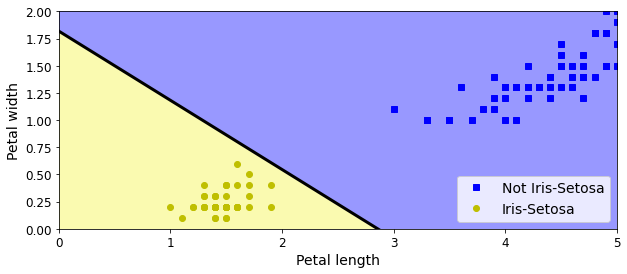

In [7]:
# Plotting predictions for Iris Setosa vs non Iris Setosa
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# meshgrid function is used to create a rectangular grid out of two given
# one-dimensional arrays representing the Cartesian indexing or Matrix indexing

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# ravel returns contiguous flattened array
# (1D array with all the input-array elements and with the same type as it)

X_new = np.c_[x0.ravel(), x1.ravel()] # Translates slice objects to concatenation along the second axis.
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

# Activation functions

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

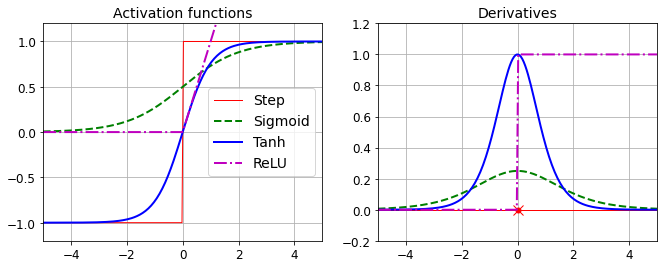

In [9]:
# plotting the Activation functions and their derivatives

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# first plot

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# second plot

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [10]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    a = activation(x1 + x2 - 1.5)
    b = activation(x1 + x2 - 0.5)
    return activation(-a + b - 0.5)

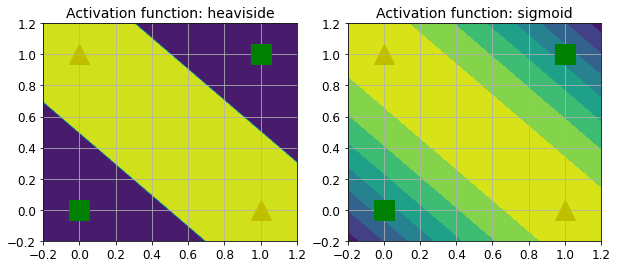

In [11]:
# plotting the Heaviside and Sigmoid function

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

# first plot

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

# second plot

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [12]:
import numpy as np
a = np.exp([0.4, 0.3])
a/np.sum(a)

array([0.52497919, 0.47502081])

# Building an Image Classifier

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
tf.__version__

'2.0.0'

In [15]:
keras.__version__

'2.2.4-tf'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:


For more infor: https://github.com/zalandoresearch/fashion-mnist

In [16]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # sorting into test and train set

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [17]:
X_train_full.shape # checking the shape of the training set

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [18]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [19]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [20]:
X_test =  X_test/255

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [21]:
y_train[0]

4

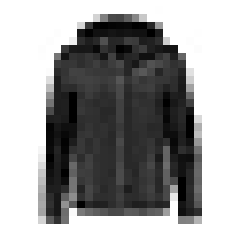

In [22]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [23]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [26]:
X_valid.shape

(5000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

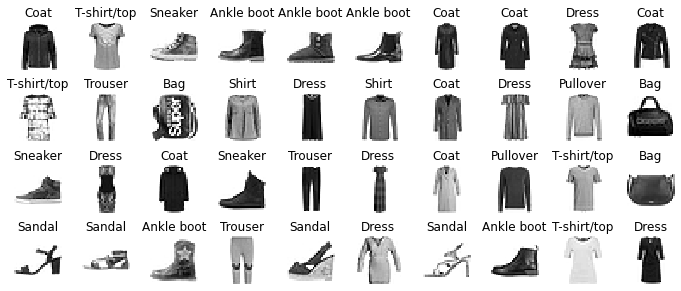

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [29]:
# Creating a classification MLP with Keras' Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # flatten layer
model.add(keras.layers.Dense(300, activation="relu")) # dense layer 1
model.add(keras.layers.Dense(100, activation="relu")) # dense layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer

In [30]:
# definition of softmax
# Softmax converts a real vector to a vector of categorical probabilities.
# The elements of the output vector are in range (0, 1) and sum to 1.
def softmax(arr):
    pos = np.exp(arr)
    return pos/sum(pos)

In [31]:
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [32]:
softmax([1,2,3,4])

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [33]:
sum([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

1.0

**Why do we need clear_session?**

It is useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. EVentually models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

In [34]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [35]:
# better way
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.layers

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
(784+1)*300 + (300+1)*100 + (100+1)*10

266610

In [93]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

# if you get:
# Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
# I tried to install the two packages in tf env but it did not work.

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [42]:
hidden1 = model.layers[1] # first layer
hidden1.name

'dense'

In [43]:
model.get_layer(hidden1.name) is hidden1 # checking if the layer is hidden

True

In [44]:
weights, biases = hidden1.get_weights() # getting the weights and biases

In [45]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [46]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
weights.shape

(784, 300)

In [50]:
biases.shape

(300,)

In [52]:
# when we need to transform to categorical
res = tf.keras.utils.to_categorical([1, 2, 0, 4])

In [53]:
res

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [55]:
# viceversa
np.argmax(res, axis=1)

array([1, 2, 0, 4])

In [80]:
# using as optimizer the Stochastic Gradient Descent
sgd = keras.optimizers.SGD(learning_rate=0.01)

# Compiling the model we created
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

In [82]:
# Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as 
# integers. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. 
# There should be # classes floating point values per feature for y_pred and a single floating point value per feature
# for y_true.
# In the snippet below, there is a single floating point value per example for y_true and # classes floating pointing
# values per example for y_pred. The shape of y_true is [batch_size] and the shape of y_pred is [batch_size, num_clas ses].
y_true = tf.convert_to_tensor([1, 2])
y_pred = tf.convert_to_tensor([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
# Using 'auto'/'sum_over_batch_size' reduction type.  
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.1769392

This is equivalent to:
```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [81]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.7228 - accuracy: 0.7622 - val_loss: 0.5310 - val_accuracy: 0.8148
Epoch 2/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4838 - accuracy: 0.8323 - val_loss: 0.4496 - val_accuracy: 0.8450
Epoch 3/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4379 - accuracy: 0.8473 - val_loss: 0.4178 - val_accuracy: 0.8556
Epoch 4/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.4127 - accuracy: 0.8556 - val_loss: 0.3899 - val_accuracy: 0.8654
Epoch 5/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3929 - accuracy: 0.8625 - val_loss: 0.3971 - val_accuracy: 0.8614
Epoch 6/30
55000/55000 [==============================] - 6s 117us/sample - loss: 0.3776 - accuracy: 0.8675 - val_loss: 0.3720 - val_accuracy: 0.8740
Epoch 7/30
55000/55000 [===========================

In [83]:
history.params # getting the param history

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [85]:
print(history.epoch) # epoch history

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [87]:
history.history.keys() # printing the history keys

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

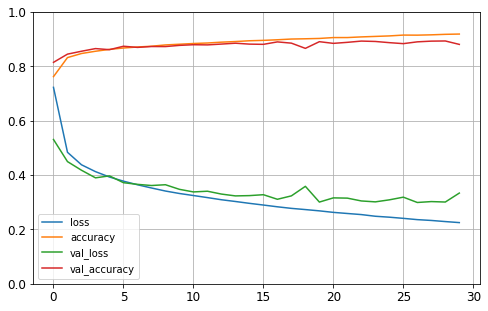

In [91]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [95]:
model.evaluate(X_test, y_test) # Evaluating the model

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3698365963816643, 0.8657]

In [96]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [122]:
# predicting first 10 elements:
X_new = X_test[:10]
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

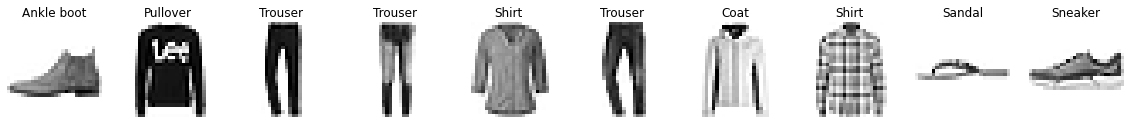

In [128]:
# Plotting the predicted elements

plt.figure(figsize=(20, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Regression MLP